## Building basic chatbot

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
     messages: Annotated[list, add_messages]
graph_builder = StateGraph(State)

In [3]:
graph_builder

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model



In [6]:
llm = ChatGroq(model= "llama-3.1-8b-instant")


In [7]:
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000001E546918A40>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001E546A65310>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [8]:
def chatbot(state: State):
    return{"messages":[llm.invoke(state["messages"])]}

In [9]:
graph_builder = StateGraph(State)
graph_builder.add_node("My Chatbot", chatbot)

graph_builder.add_edge(START, "My Chatbot")
graph_builder.add_edge("My Chatbot", END)


graph = graph_builder.compile()


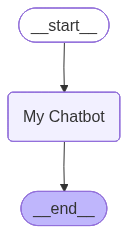

In [10]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
response = graph.invoke({"messages": ["Hi"]})

In [12]:
response["messages"]

[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='0e1cc711-6c67-4d7a-9872-ebb04045225a'),
 AIMessage(content="It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 36, 'total_tokens': 59, 'completion_time': 0.0283363, 'completion_tokens_details': None, 'prompt_time': 0.002794444, 'prompt_tokens_details': None, 'queue_time': 0.047157446, 'total_time': 0.031130744}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c7afc-fd4a-7163-a52f-d7b66d5fb54d-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 36, 'output_tokens': 23, 'total_tokens': 59})]

In [13]:
for event in graph.stream({"messages": ["Hi, hOW ARE YOU?"]}):
    print(event)

{'My Chatbot': {'messages': [AIMessage(content="I'm doing well, thank you for asking. I'm a large language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to help you with any questions or tasks you may have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 42, 'total_tokens': 98, 'completion_time': 0.232719618, 'completion_tokens_details': None, 'prompt_time': 0.001906406, 'prompt_tokens_details': None, 'queue_time': 0.045357261, 'total_time': 0.234626024}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c7afd-12a3-77d3-ada2-de6770776490-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 42, 'output_tokens': 56, 'total_tokens': 98})]}}


## CHATBOT WITH TOOL


In [14]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=3)
tool.invoke("What is current news about AI? ")

{'query': 'What is current news about AI?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.artificialintelligence-news.com/',
   'title': 'AI News | Latest News | Insights Powering AI-Driven Business Growth',
   'content': 'Gartner Data & Analytics Summit unveils expanded AI agenda for 2026 · Thailand becomes one of the first in Asia to get the Sora app · Malaysia launches Ryt Bank',
   'score': 0.68344116,
   'raw_content': None},
  {'url': 'https://techcrunch.com/category/artificial-intelligence/',
   'title': 'AI News & Artificial Intelligence | TechCrunch',
   'content': 'News coverage on artificial intelligence and machine learning tech, the companies building them, and the ethical issues AI raises today.',
   'score': 0.6426349,
   'raw_content': None},
  {'url': 'https://www.nbcnews.com/artificial-intelligence',
   'title': 'Artificial intelligence - NBC News',
   'content': "The latest news and top stories on artificial intellige

## custom function

In [15]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b
    
    Args:
        a: The first number
        b: The second number    
    
    Returns:
        int: output int
    """

In [16]:
tools = [tool, multiply]

In [18]:
llm_with_tool = llm.bind_tools(tools)
llm_with_tool

RunnableBinding(bound=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000001E546918A40>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001E546A65310>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input sho

## Making new Stategraph

In [30]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Define the function to call the LLM with tools
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tool.invoke(state["messages"])]}

## Define the graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Add edges with conditions
builder.add_edge(START, "tool_calling_llm") 
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    
    tools_condition
)
builder.add_edge("tools",END)

graph = builder.compile()


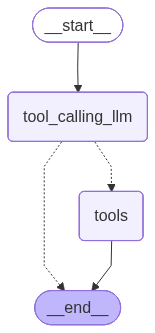

In [31]:

display(Image(graph.get_graph().draw_mermaid_png()))

In [35]:
graph.invoke({"messages": ["Hi, How are you"]})  

{'messages': [HumanMessage(content='Hi, How are you', additional_kwargs={}, response_metadata={}, id='8fe63f37-8ebb-422d-8658-7669dfb6c237'),
  AIMessage(content="I'm doing well, thank you for asking. I'm a large language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 1752, 'total_tokens': 1808, 'completion_time': 0.049091873, 'completion_tokens_details': None, 'prompt_time': 0.096831661, 'prompt_tokens_details': None, 'queue_time': 0.045197709, 'total_time': 0.145923534}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c7f68-cea2-7053-82d9-755475492913-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'inp